In [1]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model, model_selection
import seaborn as sns

In [3]:
# Check all columns of the data
pd.set_option('display.max_columns', None)
df = pd.read_csv("Resources/melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [4]:
# Create a dataframe suitable for the machine learning model
melb_df = df[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price']]
melb_df = melb_df.rename(columns={'Bedroom2':'Bedrooms'})
melb_df.head()

,Rooms,Bedrooms,Bathroom,Car,Distance,Landsize,BuildingArea,YearBuilt,Price
0,2,2,1,1.0,2.5,202,NaN,NaN,1480000
1,2,2,1,0.0,2.5,156,79.0,1900.0,1035000
2,3,3,2,0.0,2.5,134,150.0,1900.0,1465000
3,3,3,2,1.0,2.5,94,NaN,NaN,850000
4,4,3,1,2.0,2.5,120,142.0,2014.0,1600000


In [5]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         13580 non-null  int64  
 1   Bedrooms      13580 non-null  int64  
 2   Bathroom      13580 non-null  int64  
 3   Car           13518 non-null  float64
 4   Distance      13580 non-null  float64
 5   Landsize      13580 non-null  int64  
 6   BuildingArea  7130 non-null   float64
 7   YearBuilt     8205 non-null   float64
 8   Price         13580 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 955.0 KB


In [6]:
# Removing the columns that have a lot of null values
del melb_df['BuildingArea']
del melb_df['YearBuilt']
melb_df.head()

,Rooms,Bedrooms,Bathroom,Car,Distance,Landsize,Price
0,2,2,1,1.0,2.5,202,1480000
1,2,2,1,0.0,2.5,156,1035000
2,3,3,2,0.0,2.5,134,1465000
3,3,3,2,1.0,2.5,94,850000
4,4,3,1,2.0,2.5,120,1600000


In [7]:
# Removing all rows with null values
melb_df = melb_df.dropna(how='any')
melb_df.head()

,Rooms,Bedrooms,Bathroom,Car,Distance,Landsize,Price
0,2,2,1,1.0,2.5,202,1480000
1,2,2,1,0.0,2.5,156,1035000
2,3,3,2,0.0,2.5,134,1465000
3,3,3,2,1.0,2.5,94,850000
4,4,3,1,2.0,2.5,120,1600000


In [8]:
# Removing duplicate rows
melb_df = melb_df.drop_duplicates()
melb_df.head()

,Rooms,Bedrooms,Bathroom,Car,Distance,Landsize,Price
0,2,2,1,1.0,2.5,202,1480000
1,2,2,1,0.0,2.5,156,1035000
2,3,3,2,0.0,2.5,134,1465000
3,3,3,2,1.0,2.5,94,850000
4,4,3,1,2.0,2.5,120,1600000


In [9]:
melb_df.dtypes

Rooms         int64
Bedrooms      int64
Bathroom      int64
Car         float64
Distance    float64
Landsize      int64
Price         int64
dtype: object

In [10]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13435 entries, 0 to 13579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     13435 non-null  int64  
 1   Bedrooms  13435 non-null  int64  
 2   Bathroom  13435 non-null  int64  
 3   Car       13435 non-null  float64
 4   Distance  13435 non-null  float64
 5   Landsize  13435 non-null  int64  
 6   Price     13435 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 839.7 KB


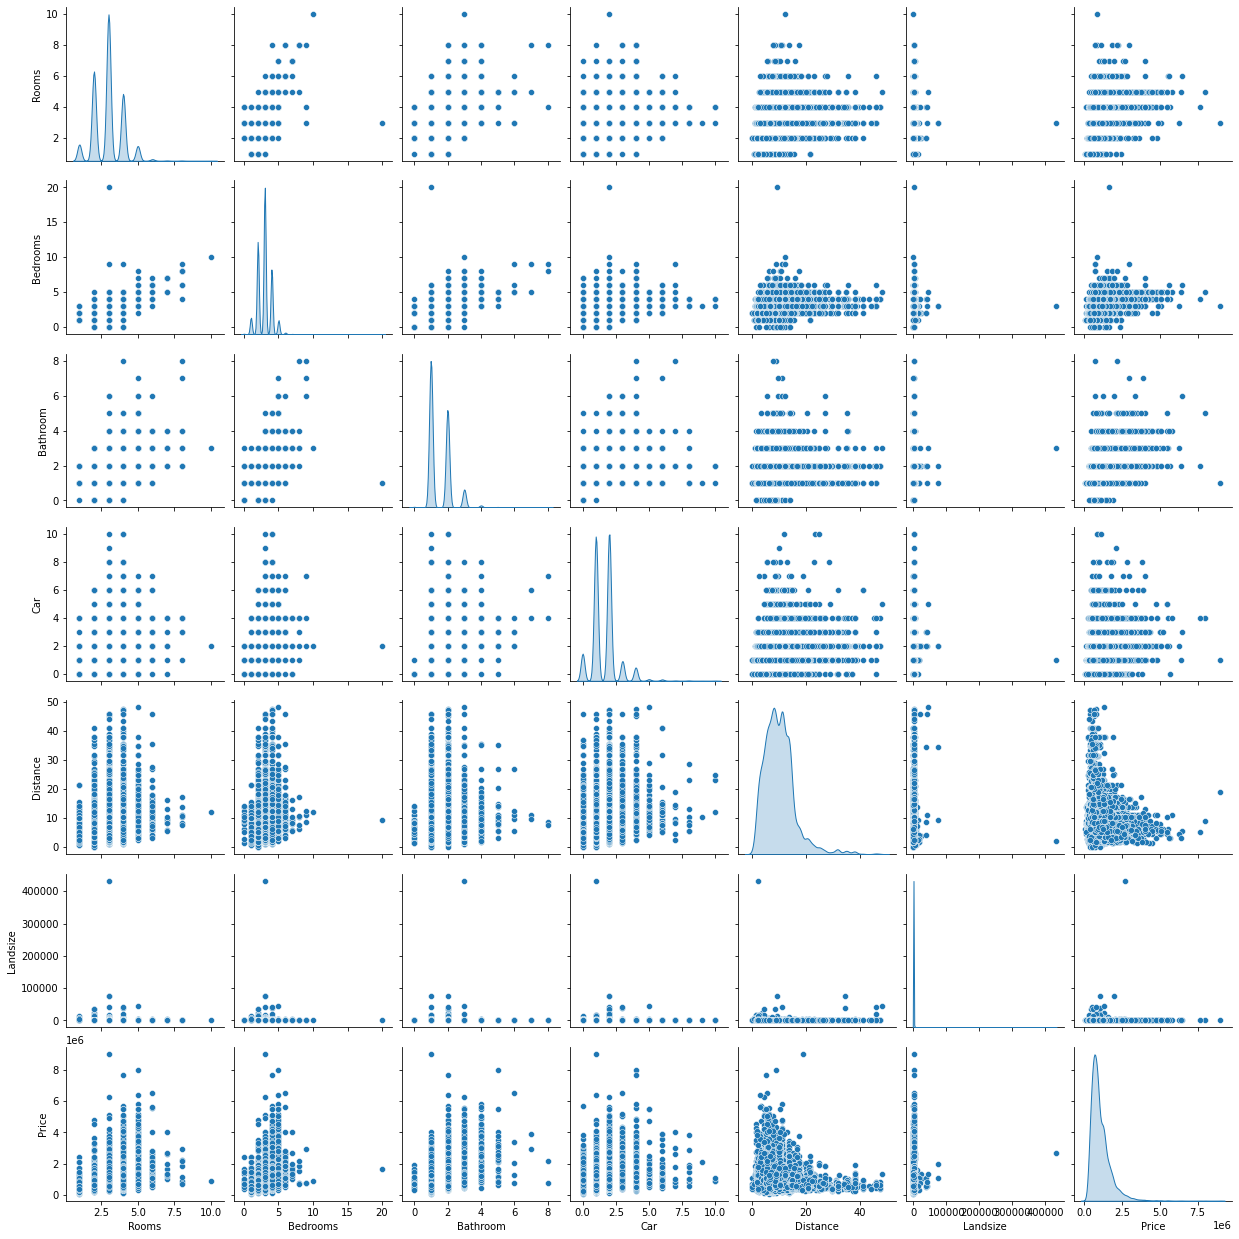

In [11]:
import seaborn as sns
sns.pairplot(data=melb_df, diag_kind='kde')

<AxesSubplot:>

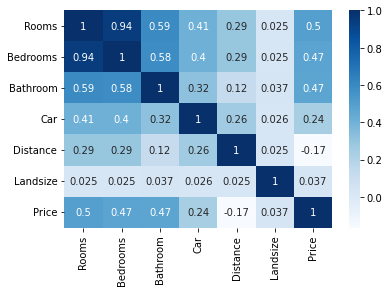

In [12]:
sns.heatmap(melb_df.corr(), cmap='Blues', annot=True)

In [27]:
# Define the features and dependent variable
# 'Landsize' will not be considered among the features as it shows weak correlation with the price
y = melb_df['Price'].values.reshape(-1, 1)
X = melb_df[['Rooms', 'Bedrooms', 'Bathroom', 'Car', 'Distance']]

#Split data into test and train
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,y, test_size=0.2, random_state=15)

In [28]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

ypred = lr.predict(X_test)
r2_score(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

(0.40152123024201747, 500908.6458080042)

In [30]:
#Scale features using sklearn StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [31]:
#Scale features using sklearn StandardScalar
from sklearn.preprocessing import StandardScaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
lr_scaled = linear_model.LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

ypred_scaled = lr_scaled.predict(X_test_scaled)
MSE = mean_squared_error(y_test, ypred_scaled)
r2_score(y_test, ypred_scaled), np.sqrt(mean_squared_error(y_test, ypred_scaled))

(0.41637815922912913, 486784.6983388803)